In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import sympy as sym

In [3]:
def f(X, Y):
    return X**2 + 2*Y**2

In [4]:
X1 = np.arange(-5, 5, 0.1)
Y1 = np.arange(-5, 5, 0.1)
Z1 = np.zeros(len(X1))

for i in range(len(X1)):
    Z1[i] = X1[i]**2 + 2*Y1[i]**2

In [5]:
X_new = np.zeros((100,2))

for i in range(len(X1)):
    X_new[i][0] = X1[i]
    X_new[i][1] = Y1[i]
    
x_list, y_list = grad_descent(X_new, Z1)

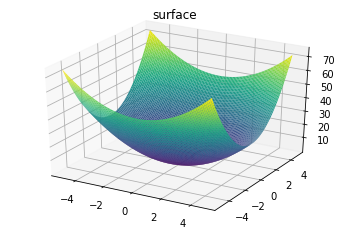

In [8]:
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = f(X1, Y1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, Y1, Z1, rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')
ax.set_title('surface')
plt.show()

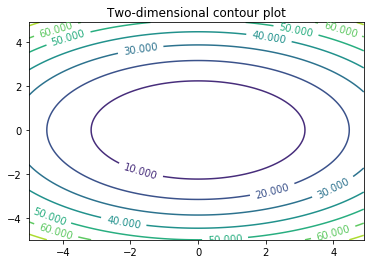

In [12]:
plt.figure()
cs = plt.contour(X1, Y1, Z1)
plt.clabel(cs, inline=1, fontsize=10)
plt.title('Two-dimensional contour plot')
plt.show()

Text(0.5, 1.0, 'Minimizing function')

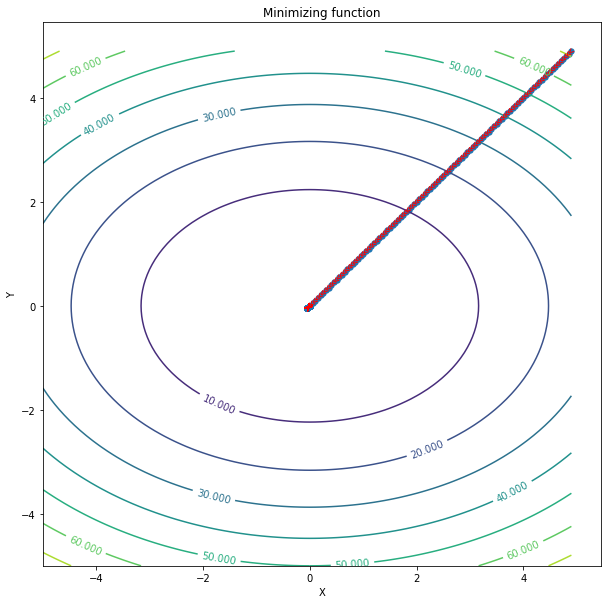

In [13]:
X, Y = zip(*x_list)
Z = y_list

ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
cs = plt.contour(X1, Y1, Z1)
plt.clabel(cs, inline=1, fontsize=10)
colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1, len(X)):
    ax[1].annotate('', xy=(X[j], Y[j]), xytext=(X[j-1], Y[j-1]),
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')
ax[1].scatter(X, Y, s=40, lw=0)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Minimizing function')
               

In [11]:
def grad_descent(X, Y):
    X_old = np.zeros((1, 2))
    X_new = np.zeros((1, 2))
    X_new[0][0] = 4.9
    X_new[0][1] = 4.9
    eps = 0.05
    precision = 0.00001
    max_iter = 200
    
    Xs = np.zeros((max_iter,2))
    Ys = np.zeros(max_iter)
    i = 0
    df = np.zeros((1,2))
    
    while max_iter > i:
        Xs[i] = X_new
        Ys[i] = X_new[0][0]**2 + 2*X_new[0][1]**2

        X_old = X_new
        
        df[0][0] = 2*X_old[0][0]
        df[0][1] = 4*X_old[0][1]
        
        X_new[0][0] = X_old[0][0] - eps * np.sign(df[0][0])
        X_new[0][1] = X_old[0][1] - eps * np.sign(df[0][1])
        
        i += 1
    return Xs, Ys